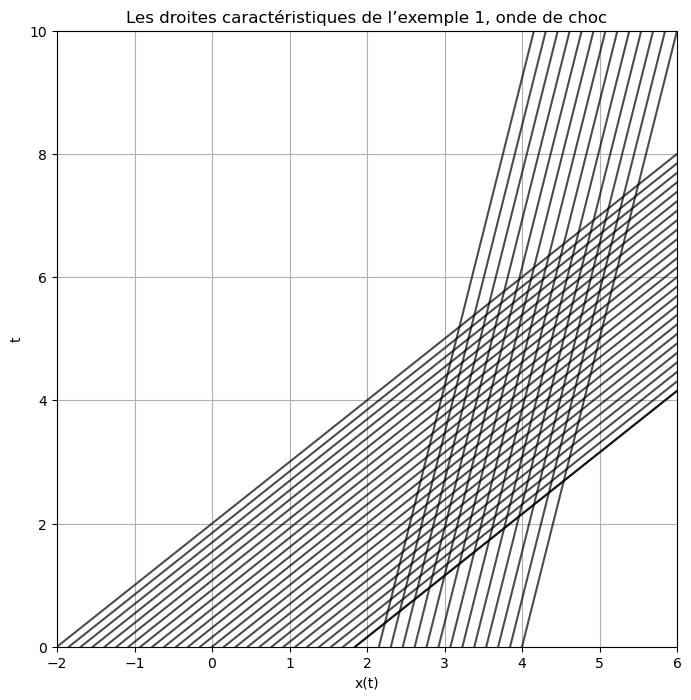

In [22]:
import numpy as np
import matplotlib.pyplot as plt

# Intervalle de t
t = np.linspace(0, 10, 400)

# Valeurs de x0 dans l'intervalle [-2, 2]
x0_values = np.linspace(-2, 4, 40)

# Création de la figure
plt.figure(figsize=(8, 8))

# Tracer les caractéristiques pour différents x0
for x0 in x0_values:
    if x0 < 2:
        x = x0 + t
    elif x0>2:
        x = x0 + 0.2 * t
    plt.plot(x, t, color='black', alpha=0.7)  # Tracer en noir avec un peu de transparence

# Configuration de la grille, des labels et des limites
plt.xlabel('x(t)')
plt.ylabel('t')
plt.title('Les droites caractéristiques de l’exemple 1, onde de choc')
plt.grid(True)

# Limites des axes pour mieux voir les caractéristiques
plt.xlim(-2, 6)
plt.ylim(0, 10)

plt.show()


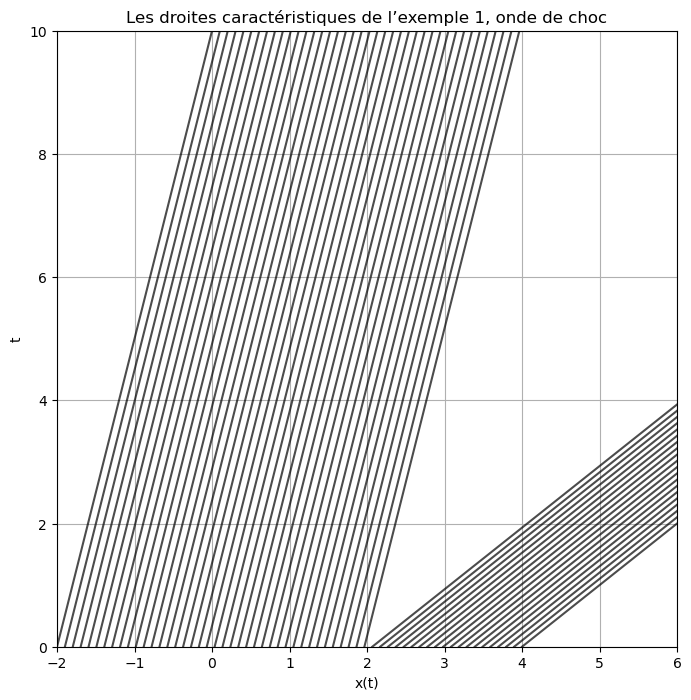

In [24]:
import numpy as np
import matplotlib.pyplot as plt

# Intervalle de t
t = np.linspace(0, 10, 400)

# Valeurs de x0 dans l'intervalle [-2, 2]
x0_values = np.linspace(-2, 4, 60)

# Création de la figure
plt.figure(figsize=(8, 8))

# Tracer les caractéristiques pour différents x0
for x0 in x0_values:
    if x0 < 2:
        x = x0 +0.2* t
    elif x0>2:
        x = x0 +  t
    plt.plot(x, t, color='black', alpha=0.7)  # Tracer en noir avec un peu de transparence

# Configuration de la grille, des labels et des limites
plt.xlabel('x(t)')
plt.ylabel('t')
plt.title('Les droites caractéristiques de l’exemple 1, onde de choc')
plt.grid(True)

# Limites des axes pour mieux voir les caractéristiques
plt.xlim(-2, 6)
plt.ylim(0, 10)

plt.show()


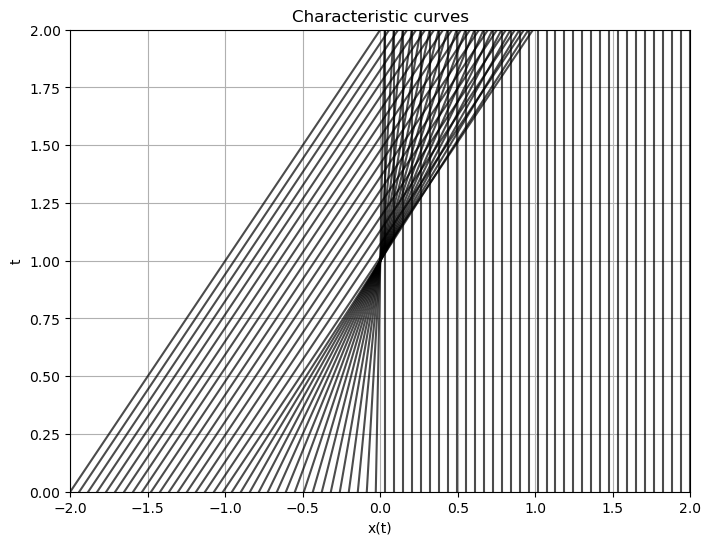

In [7]:
import numpy as np
import matplotlib.pyplot as plt

# Fonction pour calculer x(t) en fonction de x0
def x(t, x0):
    if x0 < -1:
        return t + x0
    elif -1 <= x0 <= 0:
        return -x0 * t + x0
    elif x0 > 0:
        return x0

# Intervalle de t
t_values = np.linspace(-2, 2, 400)

# Valeurs de x0 dans l'intervalle [-2, 2]
x0_values = np.linspace(-2, 2, 70)

# Création de la figure
plt.figure(figsize=(8, 6))

# Tracer les caractéristiques pour différents x0
for x0 in x0_values:
    x_values = [x(t, x0) for t in t_values]
    plt.plot(x_values, t_values, color='black', alpha=0.7)  # Tracer en noir avec un peu de transparence

# Configuration des labels, titre et grille
plt.xlabel('x(t)')
plt.ylabel('t')
plt.title('Characteristic curves')
plt.grid(True)

# Limites des axes pour mieux voir les caractéristiques
plt.xlim(-2, 2)
plt.ylim(0, 2)
plt.savefig('characteristic_curves_burgers.png', dpi=300)
plt.show()



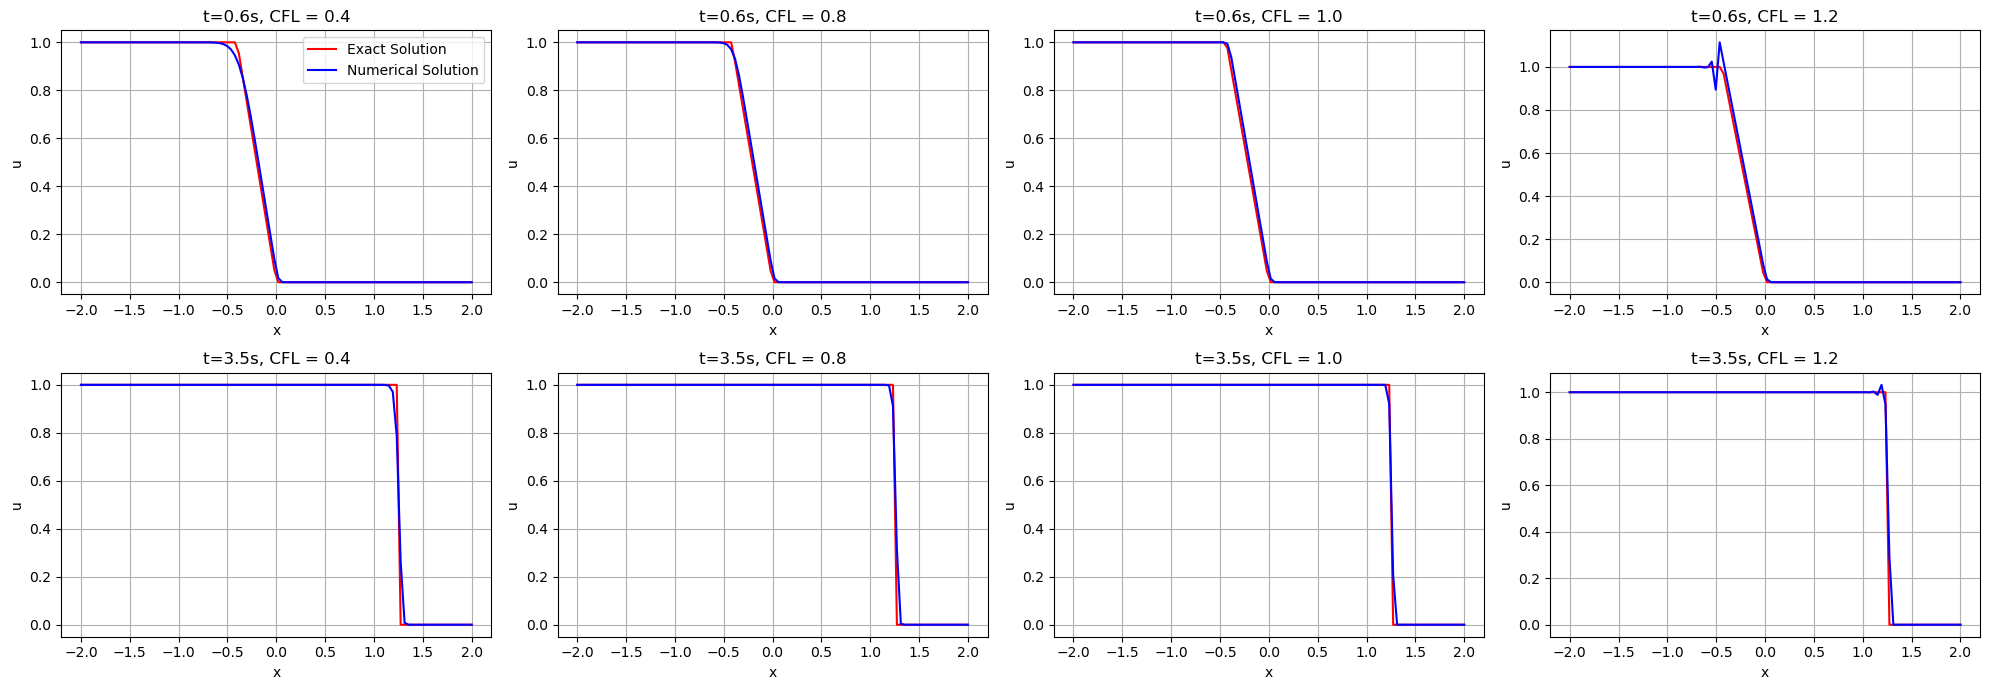

In [9]:
import numpy as np
import matplotlib.pyplot as plt

# Longueur du domaine
a = -2
b = 2
# Nombre de noeuds
N = 100
# Le pas du maillage
dx = (b-a)/(N-1)

# Coordonnées x des noeuds
x = np.linspace(a, b, N)

# Valeurs CFL (0 < CFL <= 1)
cfl_values = [0.4, 0.8, 1.0, 1.2]

# Fonction pour la condition initiale
def g(x):
    if x < -1:
        return 1
    elif -1 <= x <= 0:
        return -x
    else:
        return 0

# Configuration des sous-graphiques
fig, axs = plt.subplots(2, 4, figsize=(20, 7))  # 2 lignes, 4 colonnes

# Simulation pour t = 2 et t = 0.6
Tfinal_values = [0.6,3.5]

for row, Tfinal in enumerate(Tfinal_values):
    for col, CFL in enumerate(cfl_values):
        # Initialisation de la solution u
        u = np.zeros(N)
        for i in range(N):
            u[i] = g(x[i])

        # Tableau pour la nouvelle valeur de u
        unewp = np.zeros(N)
        # Tableau pour la solution exacte au temps courant
        unewx = np.zeros(N)

        # Temps initial
        temps = 0

        while temps < Tfinal:
            # Calcul du pas de temps pour assurer la stabilité
            max_u = np.max(np.abs(u))
            dt = CFL * dx / max_u
            lamda = dt / dx

            # Mise à jour de la solution exacte au temps courant
            if temps < 1:
                for i in range(N):
                    if x[i] - temps < -1:
                        unewx[i] = 1
                    elif -1 <= x[i] <= 0:
                        unewx[i] = -x[i] / (1 - temps)
                    else:
                        unewx[i] = 0
            else:
                for i in range(N):
                    if 2 * x[i] + 1 < temps:
                        unewx[i] = 1
                    else:
                        unewx[i] = 0

            # Mise à jour de la solution numérique
            for i in range(1, N-1):
                flux_right = 0.5 * ((u[i]**2 + u[i+1]**2) / 2) - 0.5 * np.abs((u[i] + u[i+1]) / 2) * (u[i+1] - u[i])
                flux_left = 0.5 * ((u[i-1]**2 + u[i]**2) / 2) - 0.5 * np.abs((u[i-1] + u[i]) / 2) * (u[i] - u[i-1])
                unewp[i] = u[i] - lamda * (flux_right - flux_left)

            # Conditions aux limites de Neumann (Dérivées nulles)
            unewp[N-1] = unewp[N-2]
            unewp[0] = unewp[1]

            # Mise à jour du temps
            temps += dt
            # Mise à jour de u
            u = unewp.copy()

        # Tracé des courbes de u et unewx au cours du temps
        ax = axs[row, col]
        ax.plot(x, unewx, '-r', label='Exact Solution')
        ax.plot(x, u, '-b', label='Numerical Solution')
        ax.set_title(f't={Tfinal}s, CFL = {CFL}')
        ax.set_xlabel('x')
        ax.set_ylabel('u')
        ax.grid()
        if row == 0 and col == 0:
            ax.legend()

# Enregistrer le graphique
plt.savefig('Roe_Burgers_T2_T0.6.png')

# Afficher le graphique
plt.tight_layout()
plt.show()



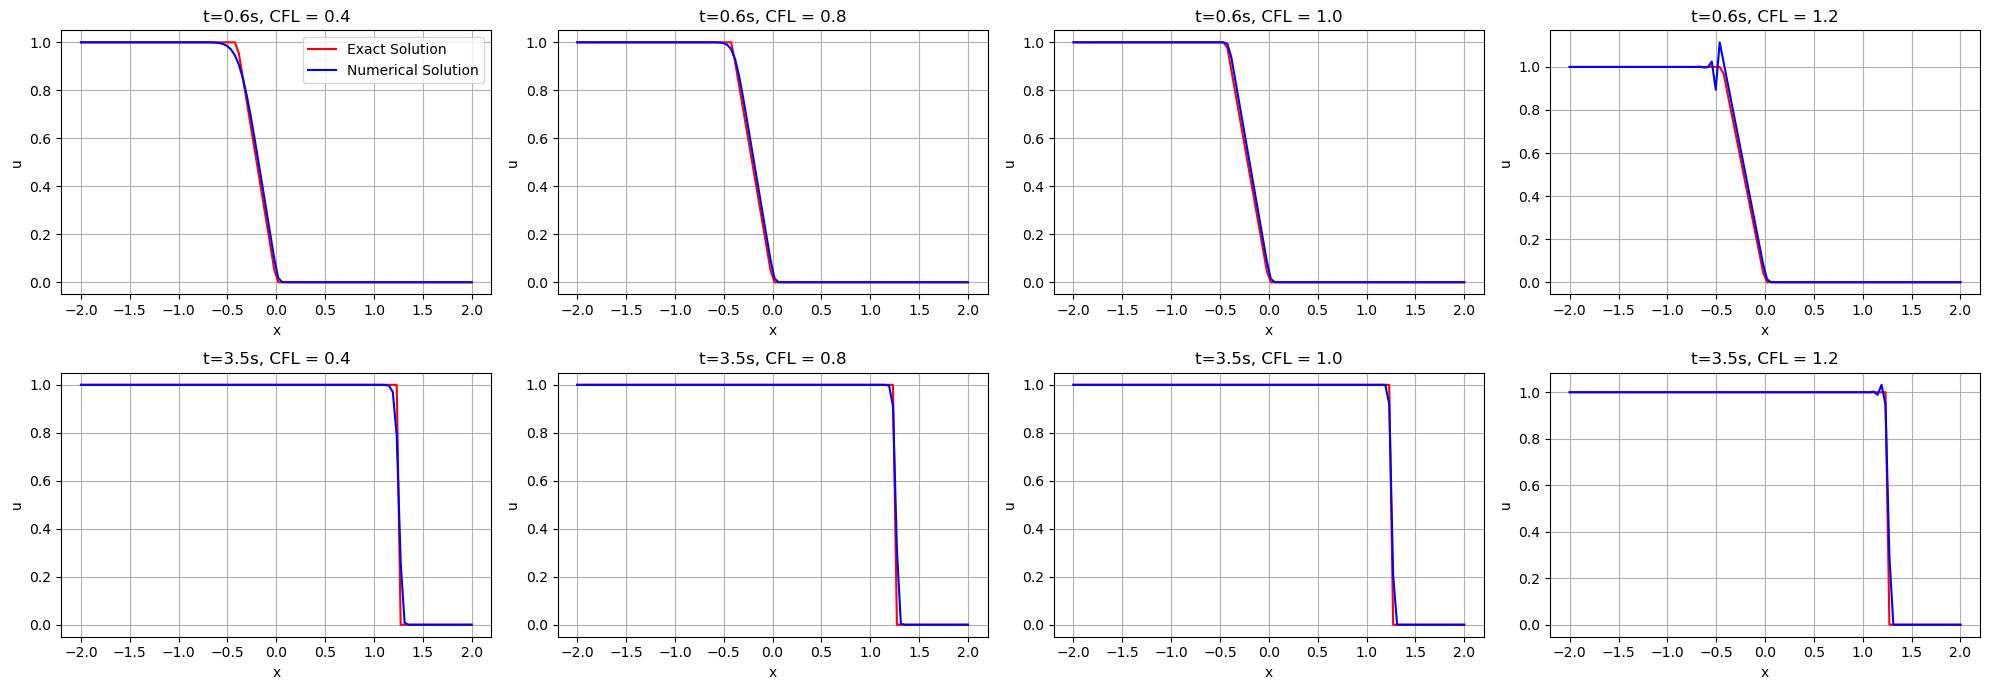

In [15]:
import numpy as np
import matplotlib.pyplot as plt

# Longueur du domaine
a = -2
b = 2
# Nombre de noeuds
N = 100
# Le pas du maillage
dx = (b-a)/(N-1)

# Coordonnées x des noeuds
x = np.linspace(a, b, N)

# Valeurs CFL (0 < CFL <= 1)
cfl_values = [0.4, 0.8, 1.0, 1.2]

# Fonction pour la condition initiale
def g(x):
    if x < -1:
        return 1
    elif -1 <= x <= 0:
        return -x
    else:
        return 0

# Configuration des sous-graphiques
fig, axs = plt.subplots(2, 4, figsize=(20, 7))  # 2 lignes, 4 colonnes

# Simulation pour t = 2 et t = 0.6
Tfinal_values = [0.6,3.5]

for row, Tfinal in enumerate(Tfinal_values):
    for col, CFL in enumerate(cfl_values):
        # Initialisation de la solution u
        u = np.zeros(N)
        for i in range(N):
            u[i] = g(x[i])

        # Tableau pour la nouvelle valeur de u
        unewp = np.zeros(N)
        # Tableau pour la solution exacte au temps courant
        unewx = np.zeros(N)

        # Temps initial
        temps = 0

        while temps < Tfinal:
            # Calcul du pas de temps pour assurer la stabilité
            max_u = np.max(np.abs(u))
            dt = CFL * dx / max_u
            lamda = dt / dx

            # Mise à jour de la solution exacte au temps courant
            if temps < 1:
                for i in range(N):
                    if x[i] - temps < -1:
                        unewx[i] = 1
                    elif -1 <= x[i] <= 0:
                        unewx[i] = -x[i] / (1 - temps)
                    else:
                        unewx[i] = 0
            else:
                for i in range(N):
                    if 2 * x[i] + 1 < temps:
                        unewx[i] = 1
                    else:
                        unewx[i] = 0

            # Mise à jour de la solution numérique
            for i in range(1, N-1):
                S_RR = max( u[i+1],u[i] )
                S_LR = min( u[i+1],u[i] )
                if S_RR == S_LR:
                    if S_LR > 0:
                        flux_right = (u[i] **2) / 2
                    elif  S_RR==0:
                        flux_right = 0
                    else:
                        flux_right = (u[i+1]**2) / 2
                    
                else:
                    if S_LR > 0:
                        flux_right = (u[i] **2) / 2
                    elif S_LR <= 0 <= S_RR:
                        flux_right = (S_RR * (u[i]**2) / 2 - S_LR * ( u[i+1]**2) / 2 + S_LR * S_RR * ( u[i+1]- u[i] )) / (S_RR - S_LR)
                    else:
                        flux_right = (u[i+1]**2) / 2

                S_RL = max( u[i-1],u[i] )
                S_LL = min( u[i-1],u[i] )
                if S_RL == S_LL:
                    if S_LL > 0:
                        flux_left = (u[i-1]**2) / 2
                    elif  S_RL==0:
                        flux_left = 0
                    else:
                        flux_left = (u[i] **2) / 2
                else:
                    if S_LL > 0:
                        flux_left = (u[i-1]**2) / 2
                    elif S_LL <= 0 <= S_RL:
                        flux_left = (S_RL * (u[i-1]**2) / 2 - S_LL * (u[i] **2) / 2 + S_LL * S_RL * (u[i]  - u[i-1])) / (S_RL - S_LL)
                    else:
                        flux_left = (u[i] **2) / 2

                unewp[i] = u[i] - lamda * (flux_right - flux_left)

            # Conditions aux limites de Neumann (Dérivées nulles)
            unewp[N-1] = unewp[N-2]
            unewp[0] = unewp[1]

            # Mise à jour du temps
            temps += dt
            # Mise à jour de u
            u = unewp.copy()

        # Tracé des courbes de u et unewx au cours du temps
        ax = axs[row, col]
        ax.plot(x, unewx, '-r', label='Exact Solution')
        ax.plot(x, u, '-b', label='Numerical Solution')
        ax.set_title(f't={Tfinal}s, CFL = {CFL}')
        ax.set_xlabel('x')
        ax.set_ylabel('u')
        ax.grid()
        if row == 0 and col == 0:
            ax.legend()

# Enregistrer le graphique
plt.savefig('HLL_Burgers_ordre1_T0.6.png')

# Afficher le graphique
plt.tight_layout()
plt.show()



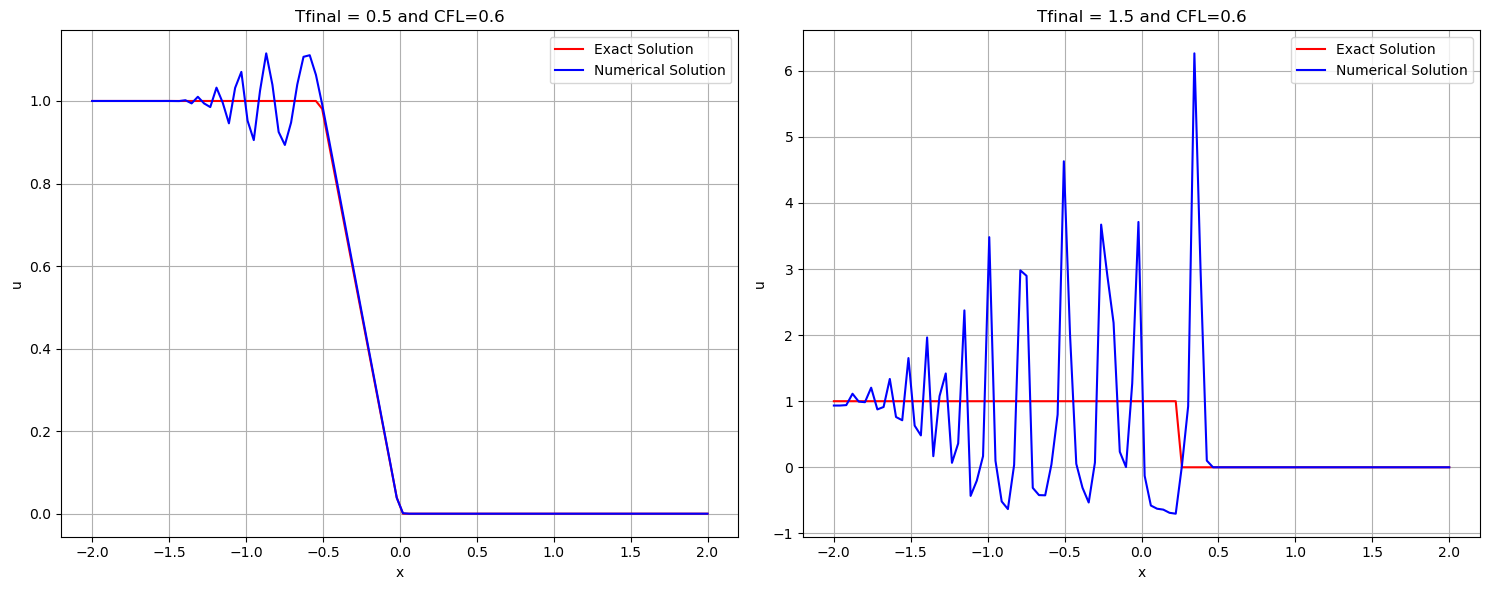

In [14]:
import numpy as np
import matplotlib.pyplot as plt

# Longueur du domaine
a = -2
b = 2
# Nombre de noeuds
N = 100
# Le pas du maillage
dx = (b - a) / (N - 1)

# Coordonnées x des noeuds
x = np.linspace(a, b, N)

# Valeur CFL
CFL = 0.6

# Fonction pour la condition initiale
def g(x):
    if x < -1:
        return 1
    elif -1 <= x <= 0:
        return -x
    else:
        return 0

# Configuration des sous-graphiques
fig, axs = plt.subplots(1, 2, figsize=(15, 6))  # 1 ligne, 2 colonnes

# Simulation pour Tfinal = 0.6 et Tfinal = 2.5
Tfinal_values = [0.5, 1.5]

for idx, Tfinal in enumerate(Tfinal_values):
    # Initialisation de la solution u
    u = np.zeros(N)
    for i in range(N):
        u[i] = g(x[i])

    # Tableau pour la nouvelle valeur de u
    unewp = np.zeros(N)
    # Tableau pour la solution exacte au temps courant
    unewx = np.zeros(N)

    # Temps initial
    temps = 0

    while temps < Tfinal:
        # Calcul du pas de temps pour assurer la stabilité
        max_u = np.max(np.abs(u))
        dt = CFL * dx / max_u
        lamda = dt / dx

        # Mise à jour de la solution exacte au temps courant
        if temps < 1:
            for i in range(N):
                if x[i] - temps < -1:
                    unewx[i] = 1
                elif temps - 1 <= x[i] <= 0:
                    unewx[i] = -x[i] / (1 - temps)
                else:
                    unewx[i] = 0
        else:
            for i in range(N):
                if 2 * x[i] + 1 < temps:
                    unewx[i] = 1
                else:
                    unewx[i] = 0

        # Mise à jour de la solution numérique
        for i in range(1, N - 1):
            U_L_right = u[i] + 1 / 2 * (u[i + 1] - u[i])
            if i == N - 2:
                U_R_right = u[N - 1]
            else:
                U_R_right = u[i + 1] - 1 / 2 * (u[i + 2] - u[i + 1])
            U_L_left = u[i - 1] + 1 / 2 * (u[i] - u[i - 1])
            U_R_left = u[i] - 1 / 2 * (u[i + 1] - u[i])
            flux_right = 0.5 * ((U_L_right ** 2 + U_R_right ** 2) / 2) - 0.5 * np.abs((U_L_right + U_R_right) / 2) * (
                    U_R_right - U_L_right)

            flux_left = 0.5 * ((U_L_left ** 2 + U_R_left ** 2) / 2) - 0.5 * np.abs((U_L_left + U_R_left) / 2) * (
                                U_R_left - U_L_left)

            unewp[i] = u[i] - lamda * (flux_right - flux_left)

        # Conditions aux limites de Neumann (Dérivées nulles)
        unewp[N - 1] = unewp[N - 2]
        unewp[0] = unewp[1]

        # Mise à jour du temps
        temps += dt
        # Mise à jour de u
        u = unewp.copy()

    # Tracé des courbes de u et unewx pour chaque Tfinal
    axs[idx].plot(x, unewx, '-r', label='Exact Solution')
    axs[idx].plot(x, u, '-b', label='Numerical Solution')
    axs[idx].set_title(f'Tfinal = {Tfinal} and CFL={CFL}')
    axs[idx].set_xlabel('x')
    axs[idx].set_ylabel('u')
    axs[idx].grid()
    axs[idx].legend()

# Ajustement de l'espacement entre les sous-graphiques
plt.savefig('Roe_Burgers_SL.6.png')
plt.tight_layout()

# Afficher le graphique
plt.show()


/tmp/ipykernel_10412/3960510407.py:22: RuntimeWarning: overflow encountered in scalar power
  "Van Albada": lambda x: max(0, (x + x**2) / (1 + x**2)),
/tmp/ipykernel_10412/3960510407.py:22: RuntimeWarning: invalid value encountered in scalar divide
  "Van Albada": lambda x: max(0, (x + x**2) / (1 + x**2)),


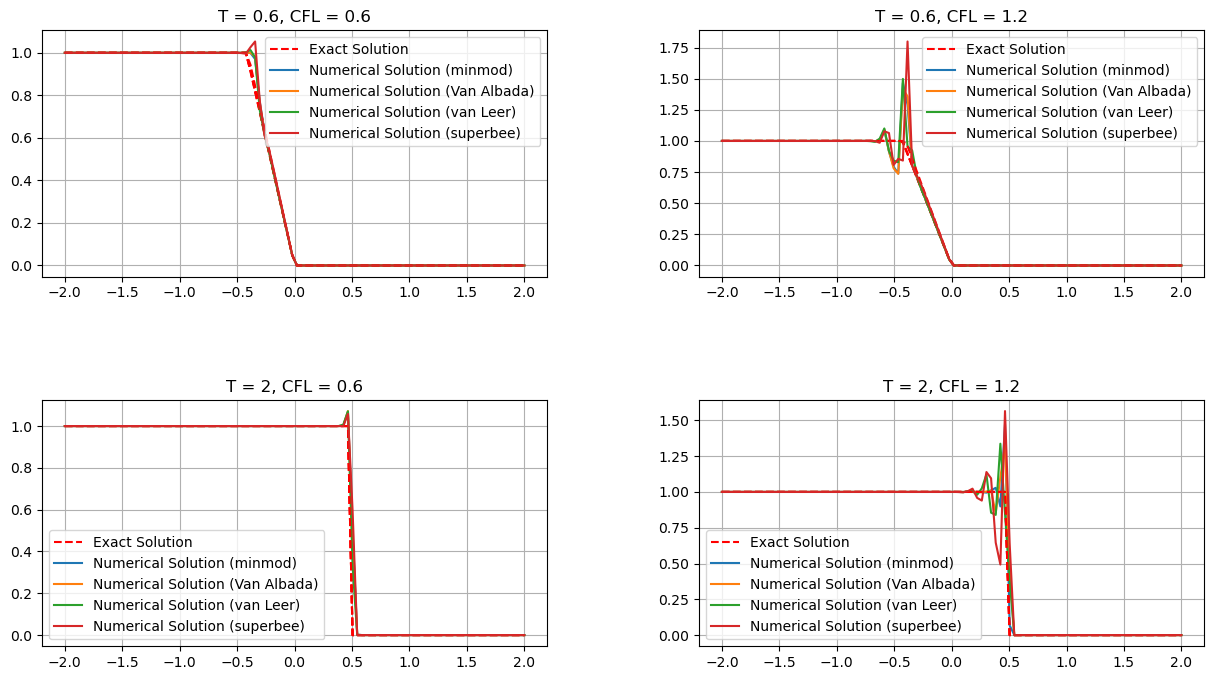

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Longueur du domaine
a = -2
b = 2
# Nombre de noeuds
N = 100
# Le pas du maillage
dx = (b - a) / (N - 1)

# Coordonnées x des noeuds
x = np.linspace(a, b, N)

# Combinaisons de CFL et Tfinal
CFL_values = [0.6, 1.2]
Tfinal_values = [0.6, 2]

# Limiteurs de pente
limiter_functions = {
    "minmod": lambda x: max(0, min(1, x)),
    "Van Albada": lambda x: max(0, (x + x**2) / (1 + x**2)),
    "van Leer": lambda x: (x + abs(x)) / (1 + abs(x)),
    "superbee": lambda x: max(0, min(2 * x, 1), min(x, 2))
}

# Fonction pour la condition initiale
def g(x):
    if x < -1:
        return 1
    elif -1 <= x <= 0:
        return -x
    else:
        return 0

# Fonction de mise à jour des solutions numériques et exactes
def update_solutions(CFL, Tfinal, phm):
    u = np.zeros(N)
    for i in range(N):
        u[i] = g(x[i])

    unewp = np.zeros(N)
    unewx = np.zeros(N)
    temps = 0

    while temps < Tfinal:
        max_u = np.max(np.abs(u))
        if max_u == 0:
            max_u = 1e-6  # Éviter la division par zéro
        dt = CFL * dx / max_u
        lamda = dt / dx

        if temps < 1:
            for i in range(N):
                if x[i] - temps < -1:
                    unewx[i] = 1
                elif (temps - 1) <= x[i] <= 0:
                    unewx[i] = -x[i] / (1 - temps)
                else:
                    unewx[i] = 0
        else:
            for i in range(N):
                if (2 * x[i] + 1) < temps:
                    unewx[i] = 1
                else:
                    unewx[i] = 0

        r = np.zeros(N)
        for i in range(1, N - 1):
            if (u[i + 1] - u[i]) != 0:
                r[i] = (u[i] - u[i - 1]) / (u[i + 1] - u[i])
            else:
                r[i] = 0

            if (u[i] - u[i - 1]) != 0:
                r[i - 1] = (u[i - 1] - u[i - 2]) / (u[i] - u[i - 1])
            else:
                r[i - 1] = 0

            if i == N - 2:
                r[i + 1] = 0
            else:
                if (u[i + 2] - u[i + 1]) != 0:
                    r[i + 1] = (u[i + 1] - u[i]) / (u[i + 2] - u[i + 1])
                else:
                    r[i + 1] = 0

            U_L_right = u[i] + 0.5 * phm(r[i]) * (u[i + 1] - u[i])
            U_R_right = u[i + 1] - 0.5 * phm(r[i + 1]) * (u[i + 2] - u[i + 1]) if i < N - 2 else u[N - 1]
            U_L_left = u[i - 1] + 0.5 * phm(r[i - 1]) * (u[i] - u[i - 1])
            U_R_left = u[i] - 0.5 * phm(r[i]) * (u[i + 1] - u[i])

            flux_right = 0.5 * ((U_L_right + U_R_right) / 2)**2 - 0.5 * abs((U_L_right + U_R_right) / 2) * (U_R_right - U_L_right)
            flux_left = 0.5 * ((U_L_left + U_R_left) / 2)**2 - 0.5 * abs((U_L_left + U_R_left) / 2) * (U_R_left - U_L_left)

            unewp[i] = u[i] - lamda * (flux_right - flux_left)

        unewp[N - 1] = unewp[N - 2]
        unewp[0] = unewp[1]
        temps += dt
        u = unewp.copy()

    return x, unewx, u

# Génération des graphes
fig, axes = plt.subplots(2, 2, figsize=(15, 8))
plt.subplots_adjust(hspace=0.5, wspace=0.3)

index = 0
for Tfinal in Tfinal_values:
    for CFL in CFL_values:
        ax = axes[index // 2, index % 2]
        for name, phm in limiter_functions.items():
            x, unewx, u = update_solutions(CFL, Tfinal, phm)
            ax.plot(x, unewx, '--r', label='Exact Solution' if name == "minmod" else "")
            ax.plot(x, u, label=f'Numerical Solution ({name})')

        ax.set_title(f"T = {Tfinal}, CFL = {CFL}")
        ax.legend()
        ax.grid()
        index += 1
plt.savefig('Roe_Burgers_with_Limiteurs.6.png')
plt.show()

/tmp/ipykernel_3340/3061945754.py:22: RuntimeWarning: overflow encountered in scalar power
  "Van Albada": lambda x: max(0, (x + x**2) / (1 + x**2)),
/tmp/ipykernel_3340/3061945754.py:22: RuntimeWarning: invalid value encountered in scalar divide
  "Van Albada": lambda x: max(0, (x + x**2) / (1 + x**2)),


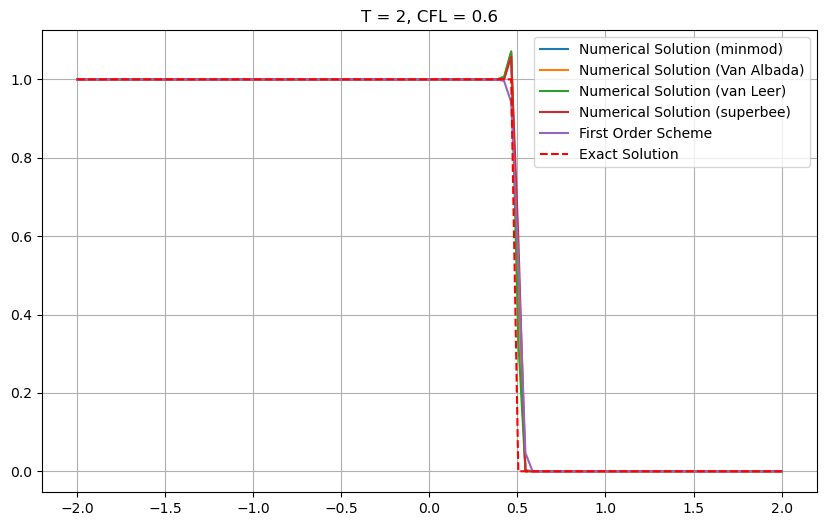

Nombre de noeuds : 99
Pas du maillage : 0.04040404040404041
Log du pas du maillage : -3.208825489014699
minmod Error: 0.1014 (log: -2.2883)
Van Albada Error: 0.0964 (log: -2.3387)
van Leer Error: 0.0682 (log: -2.6852)
superbee Error: 0.1204 (log: -2.1173)
First Order Error: 0.1099 (log: -2.2078)


In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Longueur du domaine
a = -2
b = 2
# Nombre de noeuds
N = 100
# Le pas du maillage
dx = (b - a) / (N - 1)

# Coordonnées x des noeuds
x = np.linspace(a, b, N)

# Nombre CFL (0 < CFL <= 1)
CFL = 0.6
Tfinal = 2

# Limiteurs de pente
limiter_functions = {
    "minmod": lambda x: max(0, min(1, x)),
    "Van Albada": lambda x: max(0, (x + x**2) / (1 + x**2)),
    "van Leer": lambda x: (x + abs(x)) / (1 + abs(x)),
    "superbee": lambda x: max(0, min(2 * x, 1), min(x, 2))
}

# Fonction pour la condition initiale
def g(x):
    if x < -1:
        return 1
    elif -1 <= x <= 0:
        return -x
    else:
        return 0

# Fonction de mise à jour des solutions numériques et exactes
def update_solutions(CFL, Tfinal, phm=None):
    u = np.zeros(N)
    for i in range(N):
        u[i] = g(x[i])

    unewp = np.zeros(N)
    unewx = np.zeros(N)
    temps = 0

    while temps < Tfinal:
        max_u = np.max(np.abs(u))
        if max_u == 0:
            max_u = 1e-6  # Éviter la division par zéro
        dt = CFL * dx / max_u
        lamda = dt / dx

        if temps < 1:
            for i in range(N):
                if x[i] - temps < -1:
                    unewx[i] = 1
                elif (temps - 1) <= x[i] <= 0:
                    unewx[i] = -x[i] / (1 - temps)
                else:
                    unewx[i] = 0
        else:
            for i in range(N):
                if (2 * x[i] + 1) < temps:
                    unewx[i] = 1
                else:
                    unewx[i] = 0

        r = np.zeros(N)
        for i in range(1, N - 1):
            if (u[i + 1] - u[i]) != 0:
                r[i] = (u[i] - u[i - 1]) / (u[i + 1] - u[i])
            else:
                r[i] = 0

            if (u[i] - u[i - 1]) != 0:
                r[i - 1] = (u[i - 1] - u[i - 2]) / (u[i] - u[i - 1])
            else:
                r[i - 1] = 0

            if i == N - 2:
                r[i + 1] = 0
            else:
                if (u[i + 2] - u[i + 1]) != 0:
                    r[i + 1] = (u[i + 1] - u[i]) / (u[i + 2] - u[i + 1])
                else:
                    r[i + 1] = 0

            if phm:
                U_L_right = u[i] + 0.5 * phm(r[i]) * (u[i + 1] - u[i])
                U_R_right = u[i + 1] - 0.5 * phm(r[i + 1]) * (u[i + 2] - u[i + 1]) if i < N - 2 else u[N - 1]
                U_L_left = u[i - 1] + 0.5 * phm(r[i - 1]) * (u[i] - u[i - 1])
                U_R_left = u[i] - 0.5 * phm(r[i]) * (u[i + 1] - u[i])

                flux_right = 0.5 * ((U_L_right + U_R_right) / 2)**2 - 0.5 * abs((U_L_right + U_R_right) / 2) * (U_R_right - U_L_right)
                flux_left = 0.5 * ((U_L_left + U_R_left) / 2)**2 - 0.5 * abs((U_L_left + U_R_left) / 2) * (U_R_left - U_L_left)
            else:
                flux_right = 0.5 * ((u[i]**2 + u[i + 1]**2) / 2) - 0.5 * np.abs((u[i] + u[i + 1]) / 2) * (u[i + 1] - u[i])
                flux_left = 0.5 * ((u[i - 1]**2 + u[i]**2) / 2) - 0.5 * np.abs((u[i - 1] + u[i]) / 2) * (u[i] - u[i - 1])

            unewp[i] = u[i] - lamda * (flux_right - flux_left)

        unewp[N - 1] = unewp[N - 2]
        unewp[0] = unewp[1]
        temps += dt
        u = unewp.copy()

    return x, unewx, u

# Calcul et comparaison des solutions
fig, ax = plt.subplots(figsize=(10, 6))
errors = {}

for name, phm in limiter_functions.items():
    x, unewx, u = update_solutions(CFL, Tfinal, phm)
    ax.plot(x, u, label=f'Numerical Solution ({name})')
    error = np.sqrt(np.sum((unewx - u)**2) * dx)
    errors[name] = error

# Schéma du premier ordre
x, unewx, u = update_solutions(CFL, Tfinal)
ax.plot(x, u, label='First Order Scheme')
first_order_error = np.sqrt(np.sum((unewx - u)**2) * dx)
errors["First Order"] = first_order_error

ax.plot(x, unewx, '--r', label='Exact Solution')
ax.set_title(f"T = {Tfinal}, CFL = {CFL}")
ax.legend()
ax.grid()
plt.savefig('Roe_comparision_1ordre_2ordre.6.png')
plt.show()

# Affichage des erreurs
print("Nombre de noeuds :", N - 1)
print("Pas du maillage :", dx)
print("Log du pas du maillage :", np.log(dx))
for name, error in errors.items():
    print(f"{name} Error: {error:.4f} (log: {np.log(error):.4f})")

/tmp/ipykernel_3340/4016945580.py:22: RuntimeWarning: overflow encountered in scalar power
  "Van Albada": lambda x: max(0, (x + x**2) / (1 + x**2)),
/tmp/ipykernel_3340/4016945580.py:22: RuntimeWarning: invalid value encountered in scalar divide
  "Van Albada": lambda x: max(0, (x + x**2) / (1 + x**2)),


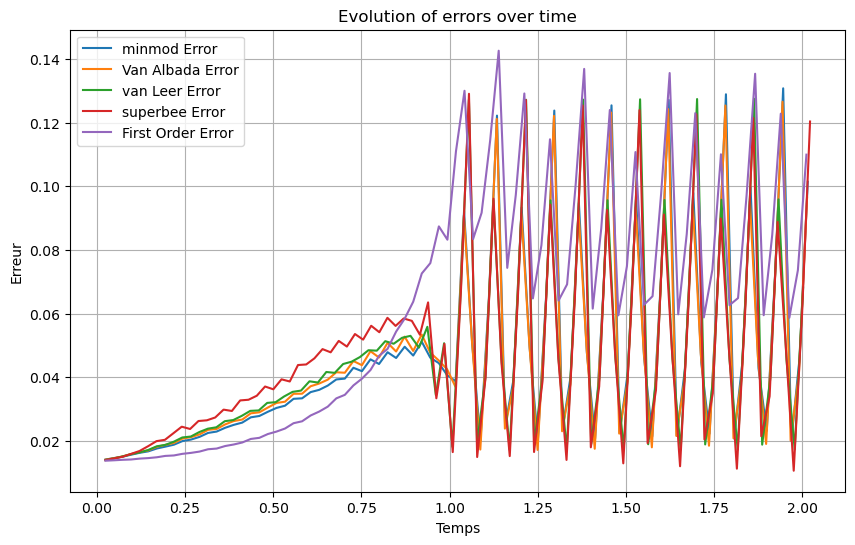

Nombre de noeuds : 99
Pas du maillage : 0.04040404040404041
Log du pas du maillage : -3.208825489014699
minmod Final Error: 0.1014 (log: -2.2883)
Van Albada Final Error: 0.0964 (log: -2.3387)
van Leer Final Error: 0.0682 (log: -2.6852)
superbee Final Error: 0.1204 (log: -2.1173)
First Order Final Error: 0.1099 (log: -2.2078)


In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Longueur du domaine
a = -2
b = 2
# Nombre de noeuds
N = 100
# Le pas du maillage
dx = (b - a) / (N - 1)

# Coordonnées x des noeuds
x = np.linspace(a, b, N)

# Nombre CFL (0 < CFL <= 1)
CFL = 0.6
Tfinal = 2

# Limiteurs de pente
limiter_functions = {
    "minmod": lambda x: max(0, min(1, x)),
    "Van Albada": lambda x: max(0, (x + x**2) / (1 + x**2)),
    "van Leer": lambda x: (x + abs(x)) / (1 + abs(x)),
    "superbee": lambda x: max(0, min(2 * x, 1), min(x, 2))
}

# Fonction pour la condition initiale
def g(x):
    if x < -1:
        return 1
    elif -1 <= x <= 0:
        return -x
    else:
        return 0

# Fonction de mise à jour des solutions numériques et exactes
def update_solutions(CFL, Tfinal, phm=None):
    u = np.zeros(N)
    for i in range(N):
        u[i] = g(x[i])

    unewp = np.zeros(N)
    unewx = np.zeros(N)
    temps = 0
    errors = []
    time_steps = []

    while temps < Tfinal:
        max_u = np.max(np.abs(u))
        if max_u == 0:
            max_u = 1e-6  # Éviter la division par zéro
        dt = CFL * dx / max_u
        lamda = dt / dx

        if temps < 1:
            for i in range(N):
                if x[i] - temps < -1:
                    unewx[i] = 1
                elif (temps - 1) <= x[i] <= 0:
                    unewx[i] = -x[i] / (1 - temps)
                else:
                    unewx[i] = 0
        else:
            for i in range(N):
                if (2 * x[i] + 1) < temps:
                    unewx[i] = 1
                else:
                    unewx[i] = 0

        r = np.zeros(N)
        for i in range(1, N - 1):
            if (u[i + 1] - u[i]) != 0:
                r[i] = (u[i] - u[i - 1]) / (u[i + 1] - u[i])
            else:
                r[i] = 0

            if (u[i] - u[i - 1]) != 0:
                r[i - 1] = (u[i - 1] - u[i - 2]) / (u[i] - u[i - 1])
            else:
                r[i - 1] = 0

            if i == N - 2:
                r[i + 1] = 0
            else:
                if (u[i + 2] - u[i + 1]) != 0:
                    r[i + 1] = (u[i + 1] - u[i]) / (u[i + 2] - u[i + 1])
                else:
                    r[i + 1] = 0

            if phm:
                U_L_right = u[i] + 0.5 * phm(r[i]) * (u[i + 1] - u[i])
                U_R_right = u[i + 1] - 0.5 * phm(r[i + 1]) * (u[i + 2] - u[i + 1]) if i < N - 2 else u[N - 1]
                U_L_left = u[i - 1] + 0.5 * phm(r[i - 1]) * (u[i] - u[i - 1])
                U_R_left = u[i] - 0.5 * phm(r[i]) * (u[i + 1] - u[i])

                flux_right = 0.5 * ((U_L_right + U_R_right) / 2)**2 - 0.5 * abs((U_L_right + U_R_right) / 2) * (U_R_right - U_L_right)
                flux_left = 0.5 * ((U_L_left + U_R_left) / 2)**2 - 0.5 * abs((U_L_left + U_R_left) / 2) * (U_R_left - U_L_left)
            else:
                flux_right = 0.5 * ((u[i]**2 + u[i + 1]**2) / 2) - 0.5 * np.abs((u[i] + u[i + 1]) / 2) * (u[i + 1] - u[i])
                flux_left = 0.5 * ((u[i - 1]**2 + u[i]**2) / 2) - 0.5 * np.abs((u[i - 1] + u[i]) / 2) * (u[i] - u[i - 1])

            unewp[i] = u[i] - lamda * (flux_right - flux_left)

        unewp[N - 1] = unewp[N - 2]
        unewp[0] = unewp[1]
        temps += dt
        u = unewp.copy()

        # Calcul de l'erreur
        error = np.sqrt(np.sum((unewx - u)**2) * dx)
        errors.append(error)
        time_steps.append(temps)

    return x, unewx, u, errors, time_steps

# Calcul et comparaison des solutions
errors_dict = {}
time_steps_dict = {}

for name, phm in limiter_functions.items():
    x, unewx, u, errors, time_steps = update_solutions(CFL, Tfinal, phm)
    errors_dict[name] = errors
    time_steps_dict[name] = time_steps

# Schéma du premier ordre
x, unewx, u, first_order_errors, first_order_time_steps = update_solutions(CFL, Tfinal)
errors_dict["First Order"] = first_order_errors
time_steps_dict["First Order"] = first_order_time_steps

# Affichage graphique des erreurs en fonction du temps
fig, ax = plt.subplots(figsize=(10, 6))

for name in errors_dict:
    ax.plot(time_steps_dict[name], errors_dict[name], label=f'{name} Error')

ax.set_xlabel('Temps')
ax.set_ylabel('Erreur')
ax.set_title('Evolution of errors over time')
ax.legend()
ax.grid()
plt.savefig('Roe_erruer_1ordre_2ordre.png')
plt.show()

# Affichage final des erreurs
print("Nombre de noeuds :", N - 1)
print("Pas du maillage :", dx)
print("Log du pas du maillage :", np.log(dx))
for name, errors in errors_dict.items():
    print(f"{name} Final Error: {errors[-1]:.4f} (log: {np.log(errors[-1]):.4f})")

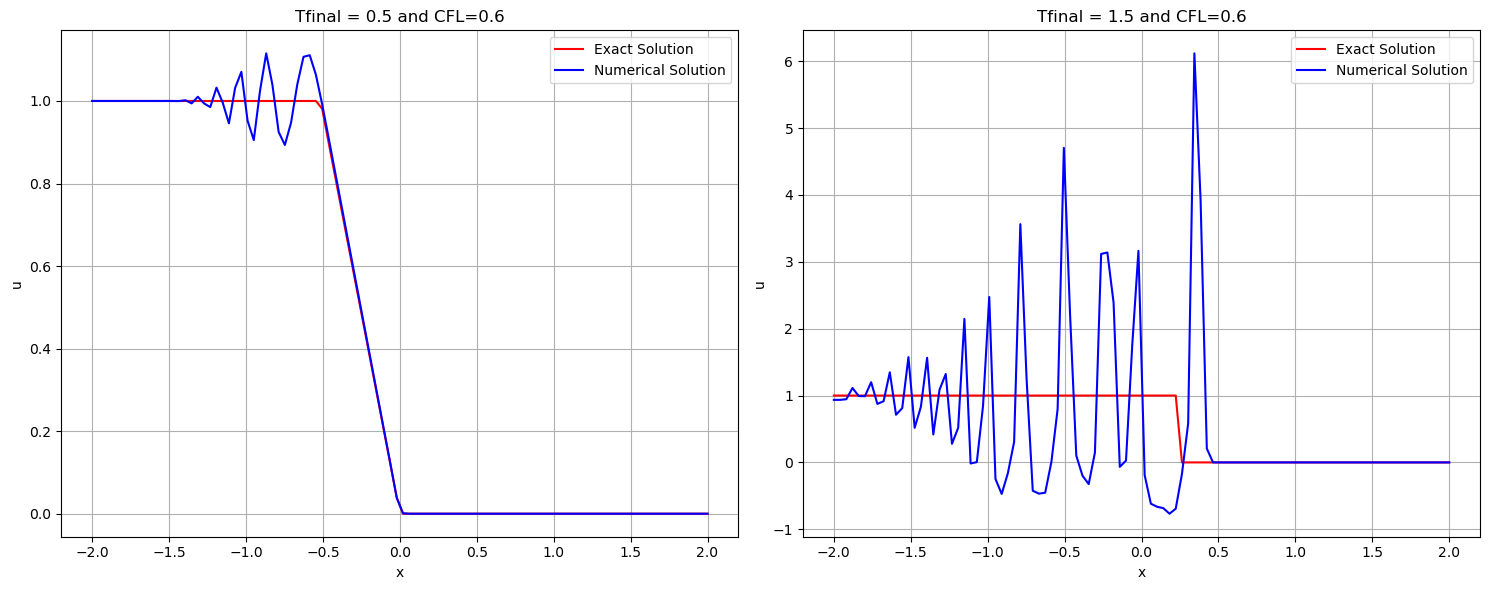

In [8]:
import numpy as np
import matplotlib.pyplot as plt

# Longueur du domaine
a = -2
b = 2
# Nombre de noeuds
N = 100
# Le pas du maillage
dx = (b - a) / (N - 1)

# Coordonnées x des noeuds
x = np.linspace(a, b, N)

# Valeur CFL
CFL = 0.6

# Fonction pour la condition initiale
def g(x):
    if x < -1:
        return 1
    elif -1 <= x <= 0:
        return -x
    else:
        return 0

# Configuration des sous-graphiques
fig, axs = plt.subplots(1, 2, figsize=(15, 6))  # 1 ligne, 2 colonnes

# Simulation pour Tfinal = 0.6 et Tfinal = 2.5
Tfinal_values = [0.5, 1.5]

for idx, Tfinal in enumerate(Tfinal_values):
    # Initialisation de la solution u
    u = np.zeros(N)
    for i in range(N):
        u[i] = g(x[i])

    # Tableau pour la nouvelle valeur de u
    unewp = np.zeros(N)
    # Tableau pour la solution exacte au temps courant
    unewx = np.zeros(N)

    # Temps initial
    temps = 0

    while temps < Tfinal:
        # Calcul du pas de temps pour assurer la stabilité
        max_u = np.max(np.abs(u))
        dt = CFL * dx / max_u
        lamda = dt / dx

        # Mise à jour de la solution exacte au temps courant
        if temps < 1:
            for i in range(N):
                if x[i] - temps < -1:
                    unewx[i] = 1
                elif temps - 1 <= x[i] <= 0:
                    unewx[i] = -x[i] / (1 - temps)
                else:
                    unewx[i] = 0
        else:
            for i in range(N):
                if 2 * x[i] + 1 < temps:
                    unewx[i] = 1
                else:
                    unewx[i] = 0

        # Mise à jour de la solution numérique
        for i in range(1, N - 1):
            U_L_right = u[i] + 1/2 * (u[i+1] - u[i])
            if i==N-2:
                U_R_right=u[N-1]
            else:
                U_R_right = u[i+1] -1/2 * (u[i+2] - u[i+1])
            U_L_left = u[i-1] + 1/2 * (u[i] - u[i-1])
            U_R_left = u[i] - 1/2 * (u[i+1] - u[i])
            S_RR = max( U_R_right,U_L_right )
            S_LR = min( U_R_right, U_L_right )
            if S_RR == S_LR:
                if S_LR > 0:
                    flux_right = (U_L_right**2) / 2
                elif  S_RR==0:
                    flux_right = 0
                else:
                    flux_right = (U_R_right **2) / 2
                
            else:
                if S_LR > 0:
                    flux_right = (U_L_right **2) / 2
                elif S_LR <= 0 <= S_RR:
                    flux_right = (S_RR * (U_L_right **2) / 2 - S_LR * ( U_R_right**2) / 2 + S_LR * S_RR * ( U_R_right- U_L_right )) / (S_RR - S_LR)
                else:
                    flux_right = (U_R_right **2) / 2

            S_RL = max(U_R_left , U_L_left)
            S_LL = min(U_L_left, U_R_left )
            if S_RL == S_LL:
                if S_LL > 0:
                    flux_left = (U_L_left**2) / 2
                elif  S_RL==0:
                    flux_left = 0
                else:
                    flux_left = (U_R_left**2) / 2
            else:
                if S_LL > 0:
                    flux_left = (U_L_left**2) / 2
                elif S_LL <= 0 <= S_RL:
                    flux_left = (S_RL * (U_L_left**2) / 2 - S_LL * (U_R_left **2) / 2 + S_LL * S_RL * (U_R_left  - U_L_left)) / (S_RL - S_LL)
                else:
                    flux_left = (U_R_left **2) / 2

          
            unewp[i] = u[i] - lamda * (flux_right - flux_left)

        # Conditions aux limites de Neumann (Dérivées nulles)
        unewp[N - 1] = unewp[N - 2]
        unewp[0] = unewp[1]

        # Mise à jour du temps
        temps += dt
        # Mise à jour de u
        u = unewp.copy()

    # Tracé des courbes de u et unewx pour chaque Tfinal
    axs[idx].plot(x, unewx, '-r', label='Exact Solution')
    axs[idx].plot(x, u, '-b', label='Numerical Solution')
    axs[idx].set_title(f'Tfinal = {Tfinal} and CFL={CFL}')
    axs[idx].set_xlabel('x')
    axs[idx].set_ylabel('u')
    axs[idx].grid()
    axs[idx].legend()

# Ajustement de l'espacement entre les sous-graphiques
plt.savefig('HLL_Burgers_SL.6.png')
plt.tight_layout()

# Afficher le graphique
plt.show()


/tmp/ipykernel_3340/2725908776.py:22: RuntimeWarning: overflow encountered in scalar power
  "Van Albada": lambda x: max(0, (x + x**2) / (1 + x**2)),
/tmp/ipykernel_3340/2725908776.py:22: RuntimeWarning: invalid value encountered in scalar divide
  "Van Albada": lambda x: max(0, (x + x**2) / (1 + x**2)),


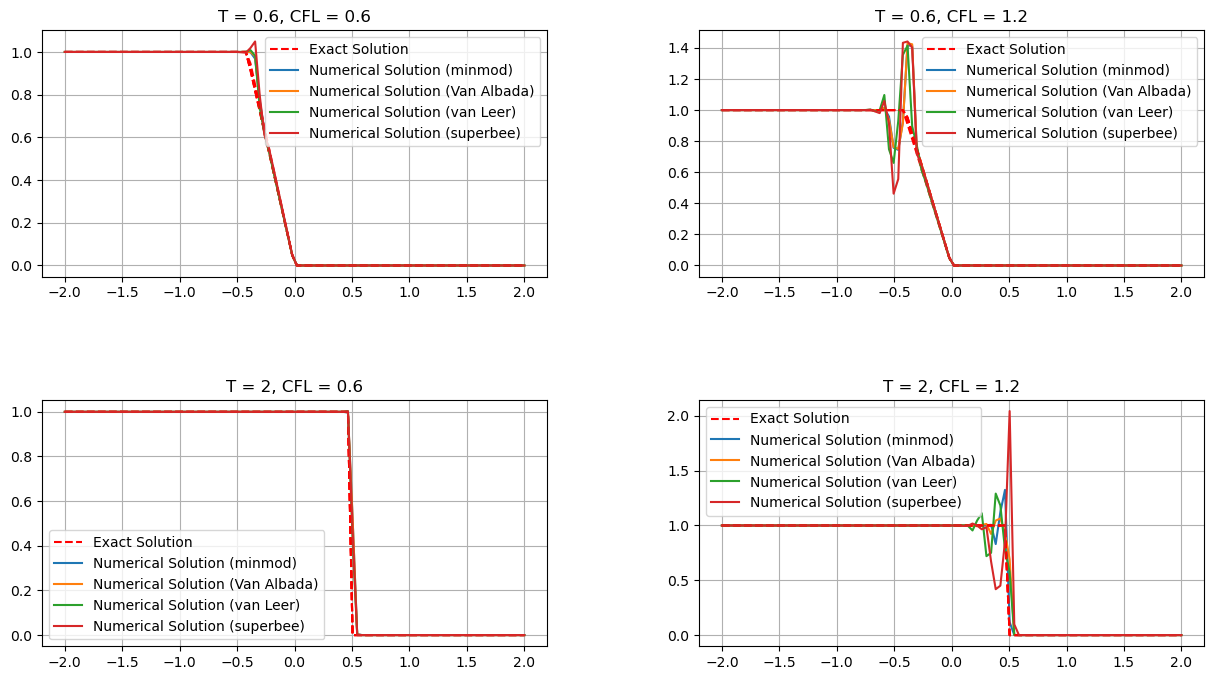

In [10]:
import numpy as np
import matplotlib.pyplot as plt

# Longueur du domaine
a = -2
b = 2
# Nombre de noeuds
N = 100
# Le pas du maillage
dx = (b - a) / (N - 1)

# Coordonnées x des noeuds
x = np.linspace(a, b, N)

# Combinaisons de CFL et Tfinal
CFL_values = [0.6, 1.2]
Tfinal_values = [0.6, 2]

# Limiteurs de pente
limiter_functions = {
    "minmod": lambda x: max(0, min(1, x)),
    "Van Albada": lambda x: max(0, (x + x**2) / (1 + x**2)),
    "van Leer": lambda x: (x + abs(x)) / (1 + abs(x)),
    "superbee": lambda x: max(0, min(2 * x, 1), min(x, 2))
}

# Fonction pour la condition initiale
def g(x):
    if x < -1:
        return 1
    elif -1 <= x <= 0:
        return -x
    else:
        return 0

# Fonction de mise à jour des solutions numériques et exactes
def update_solutions(CFL, Tfinal, phm):
    u = np.zeros(N)
    for i in range(N):
        u[i] = g(x[i])

    unewp = np.zeros(N)
    unewx = np.zeros(N)
    temps = 0

    while temps < Tfinal:
        max_u = np.max(np.abs(u))
        if max_u == 0:
            max_u = 1e-6  # Éviter la division par zéro
        dt = CFL * dx / max_u
        lamda = dt / dx

        if temps < 1:
            for i in range(N):
                if x[i] - temps < -1:
                    unewx[i] = 1
                elif (temps - 1) <= x[i] <= 0:
                    unewx[i] = -x[i] / (1 - temps)
                else:
                    unewx[i] = 0
        else:
            for i in range(N):
                if (2 * x[i] + 1) < temps:
                    unewx[i] = 1
                else:
                    unewx[i] = 0

        r = np.zeros(N)
        for i in range(1, N - 1):
            if (u[i + 1] - u[i]) != 0:
                r[i] = (u[i] - u[i - 1]) / (u[i + 1] - u[i])
            else:
                r[i] = 0

            if (u[i] - u[i - 1]) != 0:
                r[i - 1] = (u[i - 1] - u[i - 2]) / (u[i] - u[i - 1])
            else:
                r[i - 1] = 0

            if i == N - 2:
                r[i + 1] = 0
            else:
                if (u[i + 2] - u[i + 1]) != 0:
                    r[i + 1] = (u[i + 1] - u[i]) / (u[i + 2] - u[i + 1])
                else:
                    r[i + 1] = 0

            U_L_right = u[i] + 0.5 * phm(r[i]) * (u[i+1] - u[i])
            if i == N-2:
                U_R_right = u[N-1]
            else:
                U_R_right = u[i+1] - 0.5 * phm(r[i+1]) * (u[i+2] - u[i+1])
            
            U_L_left = u[i-1] + 0.5 * phm(r[i-1]) * (u[i] - u[i-1])
            U_R_left = u[i] - 0.5 * phm(r[i]) * (u[i+1] - u[i])
            
            S_RR = max(U_R_right, U_L_right)
            S_LR = min(U_R_right, U_L_right)
            
            if S_RR == S_LR:
                    if S_LR > 0:
                        flux_right = (U_L_right**2) / 2
                    elif  S_RR==0:
                        flux_right = 0
                    else:
                        flux_right = (U_R_right **2) / 2
            else:
                if S_LR > 0:
                    flux_right = (U_L_right ** 2) / 2
                elif S_LR <= 0 <= S_RR:
                    flux_right = (S_RR * (U_L_right ** 2) / 2 - S_LR * (U_R_right ** 2) / 2 + S_LR * S_RR * (U_R_right - U_L_right)) / (S_RR - S_LR)
                else:
                    flux_right = (U_R_right ** 2) / 2
            
            S_RL = max(U_R_left, U_L_left)
            S_LL = min(U_L_left, U_R_left)
            
            if S_RL == S_LL:
                if S_LL > 0:
                    flux_left = (U_L_left**2) / 2
                elif  S_RL==0:
                    flux_left = 0
                else:
                    flux_left = (U_R_left**2) / 2
            else:
                if S_LL > 0:
                    flux_left = (U_L_left ** 2) / 2
                elif S_LL <= 0 <= S_RL:
                    flux_left = (S_RL * (U_L_left ** 2) / 2 - S_LL * (U_R_left ** 2) / 2 + S_LL * S_RL * (U_R_left - U_L_left)) / (S_RL - S_LL)
                else:
                    flux_left = (U_R_left ** 2) / 2

            unewp[i] = u[i] - lamda * (flux_right - flux_left)

        unewp[N - 1] = unewp[N - 2]
        unewp[0] = unewp[1]
        temps += dt
        u = unewp.copy()

    return x, unewx, u

# Génération des graphes
fig, axes = plt.subplots(2, 2, figsize=(15, 8))
plt.subplots_adjust(hspace=0.5, wspace=0.3)

index = 0
for Tfinal in Tfinal_values:
    for CFL in CFL_values:
        ax = axes[index // 2, index % 2]
        for name, phm in limiter_functions.items():
            x, unewx, u = update_solutions(CFL, Tfinal, phm)
            ax.plot(x, unewx, '--r', label='Exact Solution' if name == "minmod" else "")
            ax.plot(x, u, label=f'Numerical Solution ({name})')

        ax.set_title(f"T = {Tfinal}, CFL = {CFL}")
        ax.legend()
        ax.grid()
        index += 1
plt.savefig('Roe_Burgers_with_Limiteurs.6.png')
plt.show()

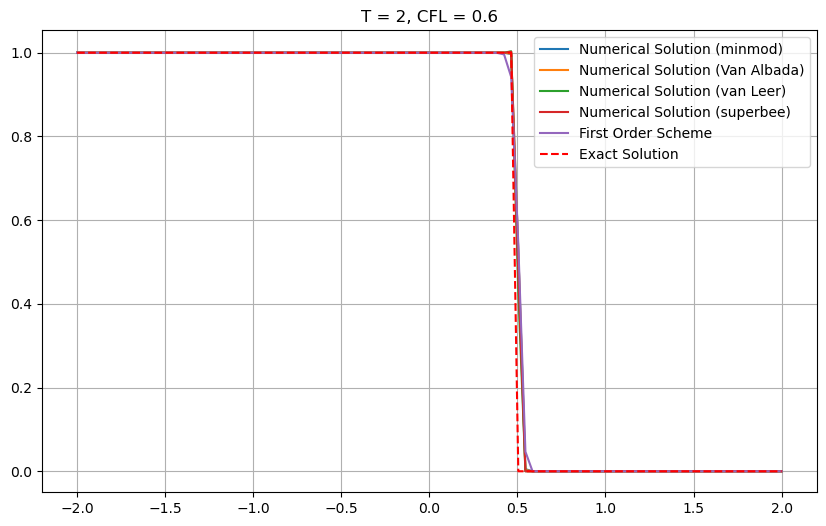

Nombre de noeuds : 99
Pas du maillage : 0.04040404040404041
Log du pas du maillage : -3.208825489014699
minmod Error: 0.1054 (log: -2.2500)
Van Albada Error: 0.1056 (log: -2.2482)
van Leer Error: 0.0861 (log: -2.4523)
superbee Error: 0.0950 (log: -2.3543)
First Order Error: 0.1099 (log: -2.2078)


In [12]:
import numpy as np
import matplotlib.pyplot as plt

# Longueur du domaine
a = -2
b = 2
# Nombre de noeuds
N = 100
# Le pas du maillage
dx = (b - a) / (N - 1)

# Coordonnées x des noeuds
x = np.linspace(a, b, N)

# Nombre CFL (0 < CFL <= 1)
CFL = 0.6
Tfinal = 2

# Limiteurs de pente
limiter_functions = {
    "minmod": lambda x: max(0, min(1, x)),
    "Van Albada": lambda x: max(0, (x + x**2) / (1 + x**2)),
    "van Leer": lambda x: (x + abs(x)) / (1 + abs(x)),
    "superbee": lambda x: max(0, min(2 * x, 1), min(x, 2))
}

# Fonction pour la condition initiale
def g(x):
    if x < -1:
        return 1
    elif -1 <= x <= 0:
        return -x
    else:
        return 0

# Fonction de mise à jour des solutions numériques et exactes
def update_solutions(CFL, Tfinal, phm=None):
    u = np.zeros(N)
    for i in range(N):
        u[i] = g(x[i])

    unewp = np.zeros(N)
    unewx = np.zeros(N)
    temps = 0

    while temps < Tfinal:
        max_u = np.max(np.abs(u))
        if max_u == 0:
            max_u = 1e-6  # Éviter la division par zéro
        dt = CFL * dx / max_u
        lamda = dt / dx

        if temps < 1:
            for i in range(N):
                if x[i] - temps < -1:
                    unewx[i] = 1
                elif (temps - 1) <= x[i] <= 0:
                    unewx[i] = -x[i] / (1 - temps)
                else:
                    unewx[i] = 0
        else:
            for i in range(N):
                if (2 * x[i] + 1) < temps:
                    unewx[i] = 1
                else:
                    unewx[i] = 0

        r = np.zeros(N)
        for i in range(1, N - 1):
            if (u[i + 1] - u[i]) != 0:
                r[i] = (u[i] - u[i - 1]) / (u[i + 1] - u[i])
            else:
                r[i] = 0

            if (u[i] - u[i - 1]) != 0:
                r[i - 1] = (u[i - 1] - u[i - 2]) / (u[i] - u[i - 1])
            else:
                r[i - 1] = 0

            if i == N - 2:
                r[i + 1] = 0
            else:
                if (u[i + 2] - u[i + 1]) != 0:
                    r[i + 1] = (u[i + 1] - u[i]) / (u[i + 2] - u[i + 1])
                else:
                    r[i + 1] = 0

            if phm:
                  
                U_L_right = u[i] + 0.5 * phm(r[i]) * (u[i+1] - u[i])
                if i == N-2:
                    U_R_right = u[N-1]
                else:
                    U_R_right = u[i+1] - 0.5 * phm(r[i+1]) * (u[i+2] - u[i+1])
                
                U_L_left = u[i-1] + 0.5 * phm(r[i-1]) * (u[i] - u[i-1])
                U_R_left = u[i] - 0.5 * phm(r[i]) * (u[i+1] - u[i])
                
                S_RR = max(U_R_right, U_L_right)
                S_LR = min(U_R_right, U_L_right)
                
                if S_RR == S_LR:
                        if S_LR > 0:
                            flux_right = (U_L_right**2) / 2
                        elif  S_RR==0:
                            flux_right = 0
                        else:
                            flux_right = (U_R_right **2) / 2
                else:
                    if S_LR > 0:
                        flux_right = (U_L_right ** 2) / 2
                    elif S_LR <= 0 <= S_RR:
                        flux_right = (S_RR * (U_L_right ** 2) / 2 - S_LR * (U_R_right ** 2) / 2 + S_LR * S_RR * (U_R_right - U_L_right)) / (S_RR - S_LR)
                    else:
                        flux_right = (U_R_right ** 2) / 2
                
                S_RL = max(U_R_left, U_L_left)
                S_LL = min(U_L_left, U_R_left)
                
                if S_RL == S_LL:
                    if S_LL > 0:
                        flux_left = (U_L_left**2) / 2
                    elif  S_RL==0:
                        flux_left = 0
                    else:
                        flux_left = (U_R_left**2) / 2
                else:
                    if S_LL > 0:
                        flux_left = (U_L_left ** 2) / 2
                    elif S_LL <= 0 <= S_RL:
                        flux_left = (S_RL * (U_L_left ** 2) / 2 - S_LL * (U_R_left ** 2) / 2 + S_LL * S_RL * (U_R_left - U_L_left)) / (S_RL - S_LL)
                    else:
                        flux_left = (U_R_left ** 2) / 2
            else:
                S_RR = max( u[i+1],u[i] )
                S_LR = min( u[i+1],u[i] )
                if S_RR == S_LR:
                    if S_LR > 0:
                        flux_right = (u[i] **2) / 2
                    elif  S_RR==0:
                        flux_right = 0
                    else:
                        flux_right = (u[i+1]**2) / 2
                    
                else:
                    if S_LR > 0:
                        flux_right = (u[i] **2) / 2
                    elif S_LR <= 0 <= S_RR:
                        flux_right = (S_RR * (u[i]**2) / 2 - S_LR * ( u[i+1]**2) / 2 + S_LR * S_RR * ( u[i+1]- u[i] )) / (S_RR - S_LR)
                    else:
                        flux_right = (u[i+1]**2) / 2

                S_RL = max( u[i-1],u[i] )
                S_LL = min( u[i-1],u[i] )
                if S_RL == S_LL:
                    if S_LL > 0:
                        flux_left = (u[i-1]**2) / 2
                    elif  S_RL==0:
                        flux_left = 0
                    else:
                        flux_left = (u[i] **2) / 2
                else:
                    if S_LL > 0:
                        flux_left = (u[i-1]**2) / 2
                    elif S_LL <= 0 <= S_RL:
                        flux_left = (S_RL * (u[i-1]**2) / 2 - S_LL * (u[i] **2) / 2 + S_LL * S_RL * (u[i]  - u[i-1])) / (S_RL - S_LL)
                    else:
                        flux_left = (u[i] **2) / 2

            unewp[i] = u[i] - lamda * (flux_right - flux_left)

        unewp[N - 1] = unewp[N - 2]
        unewp[0] = unewp[1]
        temps += dt
        u = unewp.copy()

    return x, unewx, u

# Calcul et comparaison des solutions
fig, ax = plt.subplots(figsize=(10, 6))
errors = {}

for name, phm in limiter_functions.items():
    x, unewx, u = update_solutions(CFL, Tfinal, phm)
    ax.plot(x, u, label=f'Numerical Solution ({name})')
    error = np.sqrt(np.sum((unewx - u)**2) * dx)
    errors[name] = error

# Schéma du premier ordre
x, unewx, u = update_solutions(CFL, Tfinal)
ax.plot(x, u, label='First Order Scheme')
first_order_error = np.sqrt(np.sum((unewx - u)**2) * dx)
errors["First Order"] = first_order_error

ax.plot(x, unewx, '--r', label='Exact Solution')
ax.set_title(f"T = {Tfinal}, CFL = {CFL}")
ax.legend()
ax.grid()
plt.savefig('hll_comparision_1ordre_2ordre.6.png')
plt.show()

# Affichage des erreurs
print("Nombre de noeuds :", N - 1)
print("Pas du maillage :", dx)
print("Log du pas du maillage :", np.log(dx))
for name, error in errors.items():
    print(f"{name} Error: {error:.4f} (log: {np.log(error):.4f})")

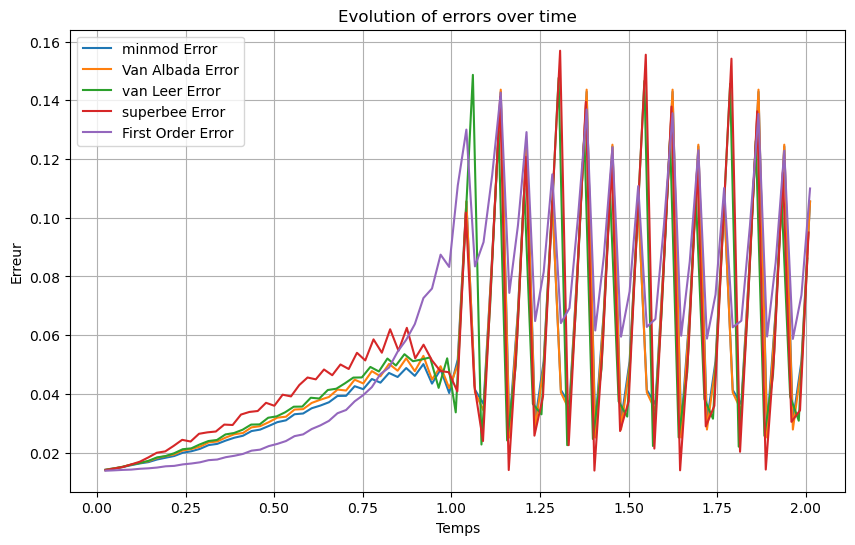

Nombre de noeuds : 99
Pas du maillage : 0.04040404040404041
Log du pas du maillage : -3.208825489014699
minmod Final Error: 0.1054 (log: -2.2500)
Van Albada Final Error: 0.1056 (log: -2.2482)
van Leer Final Error: 0.0861 (log: -2.4523)
superbee Final Error: 0.0950 (log: -2.3543)
First Order Final Error: 0.1099 (log: -2.2078)


In [14]:
import numpy as np
import matplotlib.pyplot as plt

# Longueur du domaine
a = -2
b = 2
# Nombre de noeuds
N = 100
# Le pas du maillage
dx = (b - a) / (N - 1)

# Coordonnées x des noeuds
x = np.linspace(a, b, N)

# Nombre CFL (0 < CFL <= 1)
CFL = 0.6
Tfinal = 2

# Limiteurs de pente
limiter_functions = {
    "minmod": lambda x: max(0, min(1, x)),
    "Van Albada": lambda x: max(0, (x + x**2) / (1 + x**2)),
    "van Leer": lambda x: (x + abs(x)) / (1 + abs(x)),
    "superbee": lambda x: max(0, min(2 * x, 1), min(x, 2))
}

# Fonction pour la condition initiale
def g(x):
    if x < -1:
        return 1
    elif -1 <= x <= 0:
        return -x
    else:
        return 0

# Fonction de mise à jour des solutions numériques et exactes
def update_solutions(CFL, Tfinal, phm=None):
    u = np.zeros(N)
    for i in range(N):
        u[i] = g(x[i])

    unewp = np.zeros(N)
    unewx = np.zeros(N)
    temps = 0
    errors = []
    time_steps = []

    while temps < Tfinal:
        max_u = np.max(np.abs(u))
        if max_u == 0:
            max_u = 1e-6  # Éviter la division par zéro
        dt = CFL * dx / max_u
        lamda = dt / dx

        if temps < 1:
            for i in range(N):
                if x[i] - temps < -1:
                    unewx[i] = 1
                elif (temps - 1) <= x[i] <= 0:
                    unewx[i] = -x[i] / (1 - temps)
                else:
                    unewx[i] = 0
        else:
            for i in range(N):
                if (2 * x[i] + 1) < temps:
                    unewx[i] = 1
                else:
                    unewx[i] = 0

        r = np.zeros(N)
        for i in range(1, N - 1):
            if (u[i + 1] - u[i]) != 0:
                r[i] = (u[i] - u[i - 1]) / (u[i + 1] - u[i])
            else:
                r[i] = 0

            if (u[i] - u[i - 1]) != 0:
                r[i - 1] = (u[i - 1] - u[i - 2]) / (u[i] - u[i - 1])
            else:
                r[i - 1] = 0

            if i == N - 2:
                r[i + 1] = 0
            else:
                if (u[i + 2] - u[i + 1]) != 0:
                    r[i + 1] = (u[i + 1] - u[i]) / (u[i + 2] - u[i + 1])
                else:
                    r[i + 1] = 0

            if phm:
                  
                U_L_right = u[i] + 0.5 * phm(r[i]) * (u[i+1] - u[i])
                if i == N-2:
                    U_R_right = u[N-1]
                else:
                    U_R_right = u[i+1] - 0.5 * phm(r[i+1]) * (u[i+2] - u[i+1])
                
                U_L_left = u[i-1] + 0.5 * phm(r[i-1]) * (u[i] - u[i-1])
                U_R_left = u[i] - 0.5 * phm(r[i]) * (u[i+1] - u[i])
                
                S_RR = max(U_R_right, U_L_right)
                S_LR = min(U_R_right, U_L_right)
                
                if S_RR == S_LR:
                        if S_LR > 0:
                            flux_right = (U_L_right**2) / 2
                        elif  S_RR==0:
                            flux_right = 0
                        else:
                            flux_right = (U_R_right **2) / 2
                else:
                    if S_LR > 0:
                        flux_right = (U_L_right ** 2) / 2
                    elif S_LR <= 0 <= S_RR:
                        flux_right = (S_RR * (U_L_right ** 2) / 2 - S_LR * (U_R_right ** 2) / 2 + S_LR * S_RR * (U_R_right - U_L_right)) / (S_RR - S_LR)
                    else:
                        flux_right = (U_R_right ** 2) / 2
                
                S_RL = max(U_R_left, U_L_left)
                S_LL = min(U_L_left, U_R_left)
                
                if S_RL == S_LL:
                    if S_LL > 0:
                        flux_left = (U_L_left**2) / 2
                    elif  S_RL==0:
                        flux_left = 0
                    else:
                        flux_left = (U_R_left**2) / 2
                else:
                    if S_LL > 0:
                        flux_left = (U_L_left ** 2) / 2
                    elif S_LL <= 0 <= S_RL:
                        flux_left = (S_RL * (U_L_left ** 2) / 2 - S_LL * (U_R_left ** 2) / 2 + S_LL * S_RL * (U_R_left - U_L_left)) / (S_RL - S_LL)
                    else:
                        flux_left = (U_R_left ** 2) / 2
            else:
                S_RR = max( u[i+1],u[i] )
                S_LR = min( u[i+1],u[i] )
                if S_RR == S_LR:
                    if S_LR > 0:
                        flux_right = (u[i] **2) / 2
                    elif  S_RR==0:
                        flux_right = 0
                    else:
                        flux_right = (u[i+1]**2) / 2
                    
                else:
                    if S_LR > 0:
                        flux_right = (u[i] **2) / 2
                    elif S_LR <= 0 <= S_RR:
                        flux_right = (S_RR * (u[i]**2) / 2 - S_LR * ( u[i+1]**2) / 2 + S_LR * S_RR * ( u[i+1]- u[i] )) / (S_RR - S_LR)
                    else:
                        flux_right = (u[i+1]**2) / 2

                S_RL = max( u[i-1],u[i] )
                S_LL = min( u[i-1],u[i] )
                if S_RL == S_LL:
                    if S_LL > 0:
                        flux_left = (u[i-1]**2) / 2
                    elif  S_RL==0:
                        flux_left = 0
                    else:
                        flux_left = (u[i] **2) / 2
                else:
                    if S_LL > 0:
                        flux_left = (u[i-1]**2) / 2
                    elif S_LL <= 0 <= S_RL:
                        flux_left = (S_RL * (u[i-1]**2) / 2 - S_LL * (u[i] **2) / 2 + S_LL * S_RL * (u[i]  - u[i-1])) / (S_RL - S_LL)
                    else:
                        flux_left = (u[i] **2) / 2

            unewp[i] = u[i] - lamda * (flux_right - flux_left)

        unewp[N - 1] = unewp[N - 2]
        unewp[0] = unewp[1]
        temps += dt
        u = unewp.copy()

        # Calcul de l'erreur
        error = np.sqrt(np.sum((unewx - u)**2) * dx)
        errors.append(error)
        time_steps.append(temps)

    return x, unewx, u, errors, time_steps

# Calcul et comparaison des solutions
errors_dict = {}
time_steps_dict = {}

for name, phm in limiter_functions.items():
    x, unewx, u, errors, time_steps = update_solutions(CFL, Tfinal, phm)
    errors_dict[name] = errors
    time_steps_dict[name] = time_steps

# Schéma du premier ordre
x, unewx, u, first_order_errors, first_order_time_steps = update_solutions(CFL, Tfinal)
errors_dict["First Order"] = first_order_errors
time_steps_dict["First Order"] = first_order_time_steps

# Affichage graphique des erreurs en fonction du temps
fig, ax = plt.subplots(figsize=(10, 6))

for name in errors_dict:
    ax.plot(time_steps_dict[name], errors_dict[name], label=f'{name} Error')

ax.set_xlabel('Temps')
ax.set_ylabel('Erreur')
ax.set_title('Evolution of errors over time')
ax.legend()
ax.grid()
plt.savefig('hll_erruer_1ordre_2ordre.png')
plt.show()

# Affichage final des erreurs
print("Nombre de noeuds :", N - 1)
print("Pas du maillage :", dx)
print("Log du pas du maillage :", np.log(dx))
for name, errors in errors_dict.items():
    print(f"{name} Final Error: {errors[-1]:.4f} (log: {np.log(errors[-1]):.4f})")